In [1]:
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

# Using pandas

In [2]:
df = pd.read_csv('monthly_co2.csv', index_col=[0, 1])
df.head()

co2
year month        
1958 3      315.70
     4      317.45
     5      317.51
     6      317.24
     7      315.86

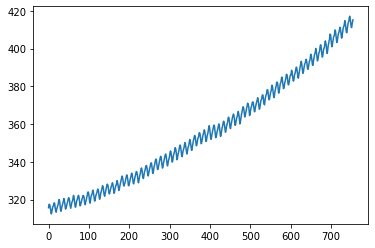

In [3]:
plt.plot(df.co2.values);

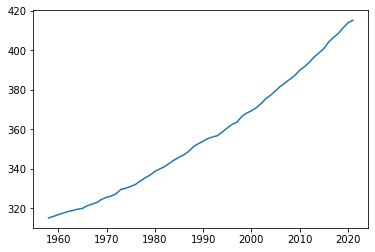

In [4]:
by_year = df.groupby('year').mean().co2
plt.plot(by_year);

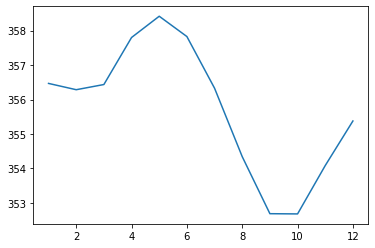

In [5]:
by_month = df.groupby('month').mean().co2
plt.plot(by_month);

# Using xarray

In [6]:
ds = xr.Dataset.from_dataframe(df)
ds

<xarray.Dataset>
Dimensions:  (month: 12, year: 64)
Coordinates:
  * year     (year) int64 1958 1959 1960 1961 1962 ... 2017 2018 2019 2020 2021
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    co2      (year, month) float64 nan nan 315.7 317.4 317.5 ... nan nan nan nan

In [9]:
ds['co2'][:10, :5]

<xarray.DataArray 'co2' (year: 10, month: 5)>
array([[   nan,    nan, 315.7 , 317.45, 317.51],
       [315.58, 316.49, 316.65, 317.72, 318.29],
       [316.43, 316.98, 317.58, 319.03, 320.04],
       [316.89, 317.7 , 318.54, 319.48, 320.58],
       [317.94, 318.55, 319.68, 320.57, 321.02],
       [318.74, 319.07, 319.86, 321.38, 322.25],
       [319.57, 320.01, 320.74, 321.84, 322.26],
       [319.44, 320.44, 320.89, 322.14, 322.17],
       [320.62, 321.6 , 322.39, 323.7 , 324.08],
       [322.33, 322.5 , 323.04, 324.42, 325.  ]])
Coordinates:
  * year     (year) int64 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
  * month    (month) int64 1 2 3 4 5

In [11]:
ds['co2'].sel(year=1960)

<xarray.DataArray 'co2' (month: 12)>
array([316.43, 316.98, 317.58, 319.03, 320.04, 319.58, 318.18, 315.9 ,
       314.17, 313.83, 315.  , 316.19])
Coordinates:
    year     int64 1960
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [11]:
ds.mean(dim='month')

<xarray.Dataset>
Dimensions:  (year: 64)
Coordinates:
  * year     (year) int64 1958 1959 1960 1961 1962 ... 2017 2018 2019 2020 2021
Data variables:
    co2      (year) float64 315.2 316.0 316.9 317.6 ... 408.5 411.4 413.9 415.2

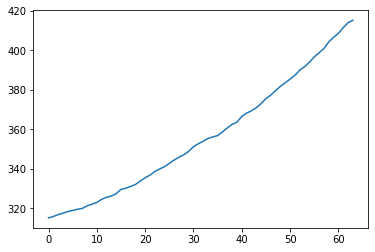

In [12]:
plt.plot(ds.mean(dim='month').co2.values);

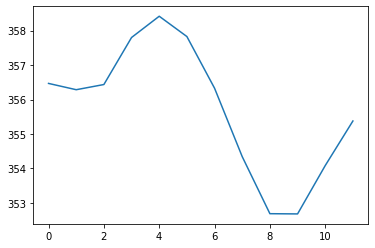

In [13]:
plt.plot(ds.mean(dim='year').co2.values);

# More computational efficiency

In [14]:
%timeit df.groupby('year').mean().co2

534 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit ds.mean(dim='month').co2.values

150 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Plotting multidimensional data

In [30]:
measures = np.load('2d_measure.npy')
measures.shape

(100, 100, 3)

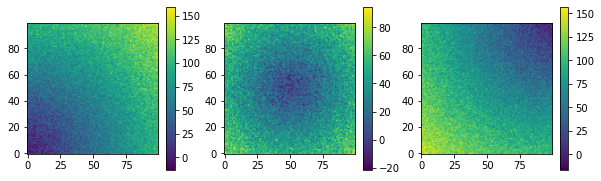

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for i in range(3):
    c = ax[i].imshow(measures[:, :, i], origin='lower')
    plt.colorbar(c, ax=ax[i])
    
plt.show()

In [33]:
da = xr.DataArray(measures, dims=['x', 'y', 'time'])
da

<xarray.DataArray (x: 100, y: 100, time: 3)>
array([[[ 17.64052346,  74.7122502 , 151.20873608],
        [ 23.40893199,  88.68272239, 130.9432473 ],
        [ 11.50088418,  67.79732172, 138.98209647],
        ...,
        [ 92.18972882,  91.66132083,  89.44483165],
        [ 96.64050299,  80.67980743, 100.99724768],
        [104.8295368 ,  66.0126522 , 103.70555875]],

       [[-12.06526852,  86.58844929, 139.53438564],
        [ -5.38756848,  75.96029538, 135.3999448 ],
        [-11.10651674,  55.1258275 , 146.2395621 ],
        ...,
        [101.39558408,  65.7015705 ,  88.20507791],
        [101.52290301,  72.38535789,  94.31987113],
        [ 96.83773567,  59.99489953,  97.21915946]],

       [[-13.50429345,  73.48408201, 130.57060008],
        [  4.61709946,  54.5333734 , 133.40125411],
        [  1.72353307,  51.27525288, 139.74440784],
        ...,
...
        ...,
        [139.59334225,  69.45203005,  11.70114718],
        [159.74474027,  75.57860183,  11.15463324],
        [145.92697287,  67.57823785,  -3.41441841]],

       [[ 98.19826983,  62.79529542,  95.21447831],
        [104.99656596,  90.69396884,  81.15582974],
        [ 91.39004435,  56.11087294,  91.48559559],
        ...,
        [146.98596586,  84.81887281,   7.84257528],
        [131.90163713,  73.77254868, -16.33161751],
        [129.26480763,  78.56284111,  10.52427415]],

       [[106.13736158,  74.38390307,  96.85257084],
        [ 97.72567573,  72.35532475, 123.88502124],
        [ 82.21943805,  82.59179812,  99.32078723],
        ...,
        [148.99323518,  69.07902117,  -4.46394768],
        [145.36266462,  64.58402504,  -3.61845193],
        [124.89437956,  79.06490289,  13.96922011]]])
Dimensions without coordinates: x, y, time

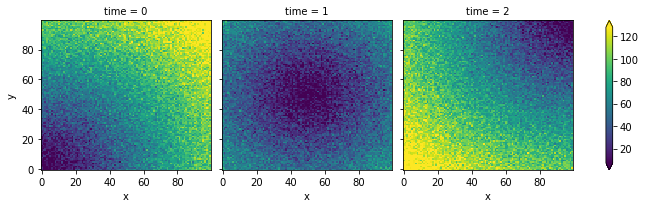

In [37]:
da.plot.imshow(x='x', y='y', col='time', robust=True);